In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# getting data
dataset = pd.read_csv("01-Distribution Model Based Clustering.csv")
dataset.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


In [3]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset)

In [4]:
from sklearn.mixture import GaussianMixture
# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42) 
labels = gmm.fit_predict(data_scaled)

In [5]:
# Add the labels to the original dataframe
dataset['Cluster'] = labels

In [6]:
from sklearn.decomposition import PCA
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [7]:
# Create a DataFrame with the PCA results and cluster labels
df_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = labels

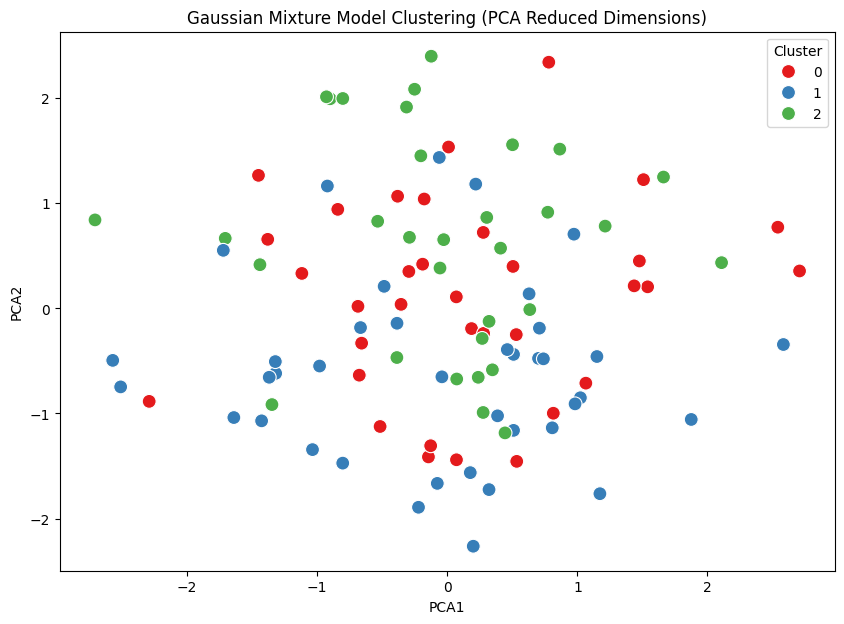

In [8]:
# Plot the PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100)
plt.title('Gaussian Mixture Model Clustering (PCA Reduced Dimensions)')
plt.show()